
### **Mô tả:**
Tập dữ liệu bao gồm *8,612* bản ghi và *24* thuộc tính, chứa thông tin chi tiết về cá nhân, gia đình, và kết quả học tập của học sinh. Tập dữ liệu này phù hợp để phân tích các yếu tố ảnh hưởng đến kết quả học tập hoặc phân loại học sinh theo các nhóm đặc điểm.
> Trong bài làm này sẽ tập trung vào phân tích các yếu tố ảnh hưởng đến *`Nhóm học sinh mà các nhân thuộc về`* (**`stu_group`**)

1. > **`id`**: Mã định danh duy nhất cho từng cá nhân trong tập dữ liệu.

1. > **`full_name`**: Tên đầy đủ của cá nhân.

1. > **`age`**: Tuổi của cá nhân.

1. > **`gender`**: Giới tính (ví dụ: Nam, Nữ).

1. > **`location`**: Địa điểm sinh sống của cá nhân.

1. > **`family_size`**: Số lượng thành viên trong gia đình.

1. > **`mother_education`**: Trình độ học vấn của mẹ (ví dụ: Trung học, Đại học).

1. > **`father_education`**: Trình độ học vấn của cha (ví dụ: Trung học, Đại học).

1. > **`mother_job`**: Nghề nghiệp của mẹ (ví dụ: Nội trợ, Giáo viên).

1. > **`father_job`**: Nghề nghiệp của cha (ví dụ: Công nhân, Kỹ sư).

1. > **`guardian`**: Người giám hộ chính của cá nhân (ví dụ: Cha, Mẹ, Người khác).

1. > **`parental_involvement`**: Mức độ cha mẹ tham gia vào việc học tập của con (ví dụ: Cao, Thấp).

1. > **`internet_access`**: Cá nhân có quyền truy cập internet hay không (Có/Không).

1. > **`studytime`**: Thời gian học ở nhà mỗi ngày (tính bằng giờ).

1. > **`tutoring`**: Cá nhân có tham gia học thêm ngoài giờ hay không (Có/Không).

1. > **`school_type`**: Loại trường học cá nhân đang theo học (Công lập/Tư thục).

1. > **`attendance`**: Số lần hoặc tỷ lệ tham gia lớp học.

1. > **`extra_curricular_activities`**: Cá nhân có tham gia các hoạt động ngoại khóa hay không (Có/Không).

1. > **`english`**: Điểm số môn tiếng Anh.

1. > **`math`**: Điểm số môn Toán.

1. > **`science`**: Điểm số môn Khoa học.

1. > **`social_science`**: Điểm số môn Khoa học Xã hội.

1. > **`art_culture`**: Điểm số môn Nghệ thuật và Văn hóa.

1. > **`stu_group`** ✅: Nhóm học sinh mà cá nhân thuộc về (phân loại theo nhóm)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Load** & **Check** info Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/BTL_DW/bd_students_per.csv')
df.head()

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
0,2,Avi Biswas,16,Male,Urban,6,SSC,HSC,No,No,...,Yes,Private,95,Yes,95,98,92,94,98,Science
1,3,Taslima Sultana,18,Female,Rural,6,SSC,HSC,No,Yes,...,No,Semi_Govt,92,No,65,71,40,78,80,Commerce
2,4,Md Adilur Rahman,15,Male,Rural,4,SSC,SSC,Yes,Yes,...,Yes,Govt,81,Yes,64,78,58,86,74,Commerce
3,5,Saleh Ahmed,16,Male,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Private,90,Yes,84,90,85,86,88,Science
4,6,Din Islam,17,Male,Urban,5,Honors,Masters,No,Yes,...,Yes,Semi_Govt,75,Yes,54,70,45,79,76,Commerce


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           8612 non-null   int64 
 1   full_name                    8612 non-null   object
 2   age                          8612 non-null   int64 
 3   gender                       8612 non-null   object
 4   location                     8611 non-null   object
 5   family_size                  8612 non-null   int64 
 6   mother_education             8602 non-null   object
 7   father_education             8608 non-null   object
 8   mother_job                   8612 non-null   object
 9   father_job                   8612 non-null   object
 10  guardian                     8612 non-null   object
 11  parental_involvement         8612 non-null   object
 12  internet_access              8612 non-null   object
 13  studytime                    8612

In [5]:
df.nunique()

,0
id,8612
full_name,7085
age,7
gender,2
location,5
family_size,11
mother_education,8
father_education,8
mother_job,2
father_job,2


In [6]:
df.isnull().sum().sum()

15

In [7]:
df.describe()

,id,age,family_size,studytime,attendance,english,math,science,social_science,art_culture
count,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000
mean,4307.500000,16.614375,4.502206,4.746168,74.027055,73.610427,72.938110,73.524036,74.465513,76.236066
std,2486.214593,0.969057,1.656726,2.185645,13.290046,15.343903,15.816147,15.115104,14.945846,13.619125
min,2.000000,10.000000,0.000000,1.000000,30.000000,18.000000,33.000000,33.000000,36.000000,36.000000
25%,2154.750000,16.000000,3.000000,3.000000,63.000000,64.000000,64.000000,63.000000,65.000000,69.000000
50%,4307.500000,17.000000,5.000000,5.000000,73.000000,75.000000,73.000000,75.000000,77.000000,76.000000
75%,6460.250000,17.000000,6.000000,6.000000,86.000000,85.000000,84.000000,85.000000,86.000000,86.000000
max,8613.000000,24.000000,11.000000,16.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [8]:
df.describe(include='object')

,full_name,gender,location,mother_education,father_education,mother_job,father_job,guardian,parental_involvement,internet_access,tutoring,school_type,extra_curricular_activities,stu_group
count,8612,8612,8611,8602,8608,8612,8612,8612,8612,8612,8612,8612,8612,8612
unique,7085,2,5,8,8,2,2,3,2,2,2,3,2,6
top,Nusrat Jahan,Male,City,SSC,HSC,No,Yes,Father,Yes,Yes,Yes,Govt,Yes,commerce
freq,10,4337,2971,1492,1345,4478,4818,3165,4561,4676,4425,3151,4583,2677


In [9]:
df[df['full_name'] == 'Nusrat Jahan']

,id,full_name,age,gender,location,family_size,mother_education,father_education,mother_job,father_job,...,tutoring,school_type,attendance,extra_curricular_activities,english,math,science,social_science,art_culture,stu_group
89,91,Nusrat Jahan,16,Female,City,4,SSC,HSC,No,Yes,...,Yes,Private,90,Yes,80,71,85,86,86,Science
126,128,Nusrat Jahan,17,Female,Rural,6,SSC,SSC,Yes,Yes,...,Yes,Semi_Govt,72,No,64,48,53,68,72,Arts
201,203,Nusrat Jahan,16,Female,City,4,SSC,SSC,Yes,Yes,...,Yes,Govt,90,Yes,81,89,80,88,90,Science
503,505,Nusrat Jahan,16,Female,City,5,Hons,Masters,Yes,Yes,...,Yes,Govt,88,Yes,77,72,75,76,78,Commerce
523,525,Nusrat Jahan,18,Female,City,3,Masters,SSC,Yes,No,...,Yes,Semi_Govt,86,Yes,92,89,91,90,85,Science
539,541,Nusrat Jahan,16,Female,City,5,Honors,SSC,No,Yes,...,No,Semi_Govt,77,No,58,60,59,57,66,Arts
1801,1803,Nusrat Jahan,17,Female,Urban,5,HSC,Diploma,Yes,No,...,Yes,Semi_Govt,95,Yes,88,94,93,98,84,science
7614,7616,Nusrat Jahan,16,Female,City,5,Hons,Masters,Yes,Yes,...,Yes,Govt,88,Yes,77,72,75,76,78,Commerce
7634,7636,Nusrat Jahan,18,Female,City,3,Masters,SSC,Yes,No,...,Yes,Semi_Govt,86,Yes,92,89,91,90,85,Science
7650,7652,Nusrat Jahan,16,Female,City,5,Honors,SSC,No,Yes,...,No,Semi_Govt,77,No,58,60,59,57,66,Arts


### EDA & Feature engineering

In [10]:
df.columns

Index(['id', 'full_name', 'age', 'gender', 'location', 'family_size',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'guardian', 'parental_involvement', 'internet_access', 'studytime',
       'tutoring', 'school_type', 'attendance', 'extra_curricular_activities',
       'english', 'math', 'science', 'social_science', 'art_culture',
       'stu_group'],
      dtype='object')

In [11]:
# correlation_matrix = df.iloc[:, 2:].corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
# plt.title("Heatmap Ma Trận Tương Quan")
# plt.show()

#### Target column: **`stu_group`**

In [12]:
df['stu_group'].value_counts()

,count
stu_group,
commerce,2677
science,2621
arts,2610
Science,354
Commerce,209
Arts,141


In [13]:
df['stu_group'].isnull().sum()

0

In [14]:
df['stu_group'].dtypes.name

'object'

In [15]:
df['stu_group'] = df['stu_group'].astype('string')

In [16]:
df['stu_group'] = df['stu_group'].apply(lambda x: x.capitalize())

<Axes: xlabel='stu_group', ylabel='count'>

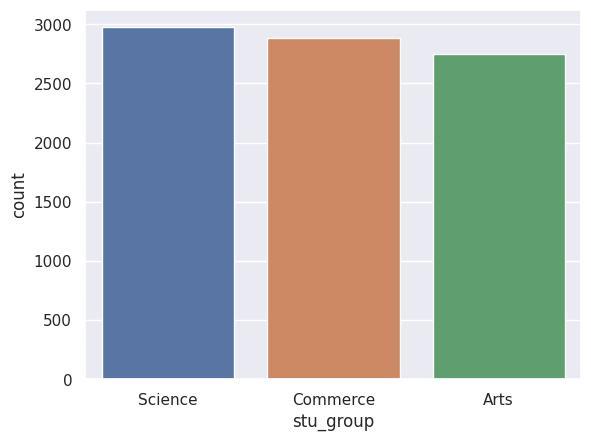

In [17]:
sns.countplot(x='stu_group', data=df, hue = 'stu_group')

#### **`Age`**

In [18]:
df['age'].describe()

,age
count,8612.000000
mean,16.614375
std,0.969057
min,10.000000
25%,16.000000
50%,17.000000
75%,17.000000
max,24.000000


In [19]:
df['age'].value_counts()

,count
age,
17,3484
16,2424
18,1336
15,1239
19,126
10,2
24,1


In [20]:
df['age'].isnull().sum()

0

<Axes: xlabel='age', ylabel='count'>

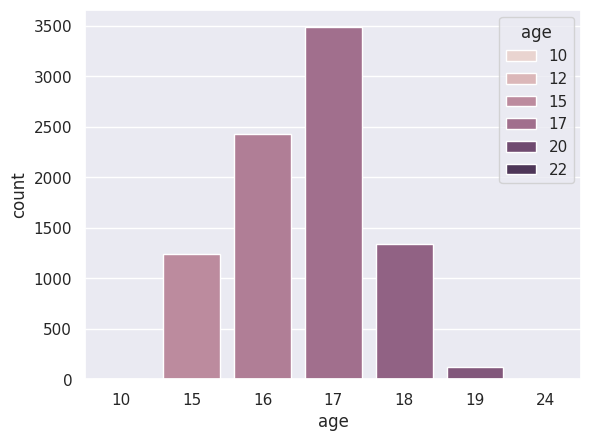

In [21]:
sns.countplot(data = df , x = df['age'] , hue = 'age')

<Axes: xlabel='age', ylabel='count'>

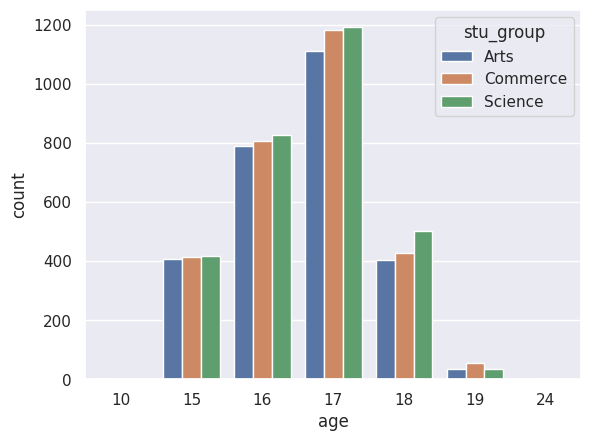

In [22]:
sns.countplot(x='age', data=df, hue = 'stu_group')

> Age không anh hưởng đến việc phân chia gr học cho học sinh

#### **`gender`**

In [23]:
df['gender'].value_counts()

,count
gender,
Male,4337
Female,4275


In [24]:
df['gender'].isnull().sum()

0

<Axes: xlabel='gender', ylabel='count'>

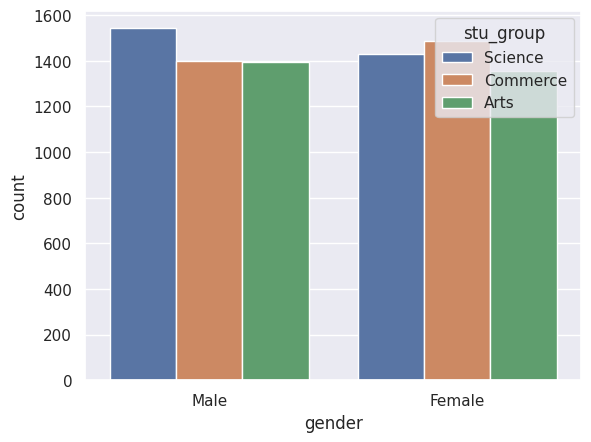

In [25]:
sns.countplot(x='gender', data=df, hue = 'stu_group')

> gender không anh hưởng đến target

In [26]:
df.columns

Index(['id', 'full_name', 'age', 'gender', 'location', 'family_size',
       'mother_education', 'father_education', 'mother_job', 'father_job',
       'guardian', 'parental_involvement', 'internet_access', 'studytime',
       'tutoring', 'school_type', 'attendance', 'extra_curricular_activities',
       'english', 'math', 'science', 'social_science', 'art_culture',
       'stu_group'],
      dtype='object')

#### **`location`**

In [27]:
df['location'].value_counts()

,count
location,
City,2971
Urban,2874
Rural,2549
city,128
urban,89


In [28]:
df['location'].isnull().sum()

1

In [29]:
# Group by 'stu_group' và điền giá trị NaN bằng giá trị xuất hiện nhiều nhất trong mỗi nhóm
df['location'] = df.groupby('stu_group')['location'].transform(lambda x: x.fillna(x.mode()[0]))

In [30]:
df['location'] = df['location'].astype('string')

In [31]:
df['location'] = df['location'].apply(lambda x: x.capitalize())

<Axes: xlabel='location', ylabel='count'>

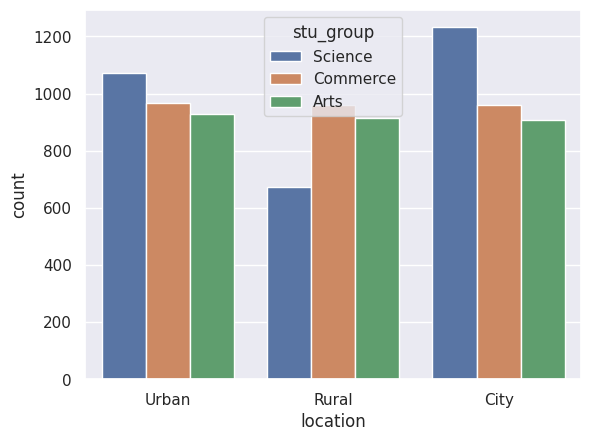

In [32]:
sns.countplot(x='location', data=df, hue = 'stu_group')

> có sự ảnh hưởng đôi chút

#### **family_size**

In [33]:
df['family_size'].value_counts()

,count
family_size,
5,1657
4,1557
6,1438
3,1407
2,1293
7,1216
8,27
0,7
9,5


In [34]:
df['family_size'].isnull().sum()

0

<Axes: xlabel='family_size', ylabel='count'>

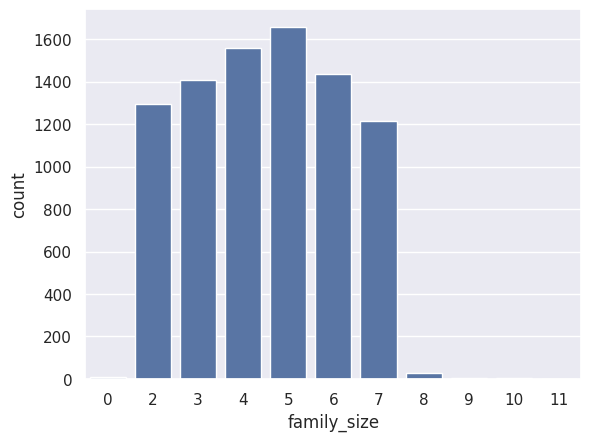

In [35]:
sns.countplot(x='family_size', data=df)

<Axes: xlabel='family_size', ylabel='count'>

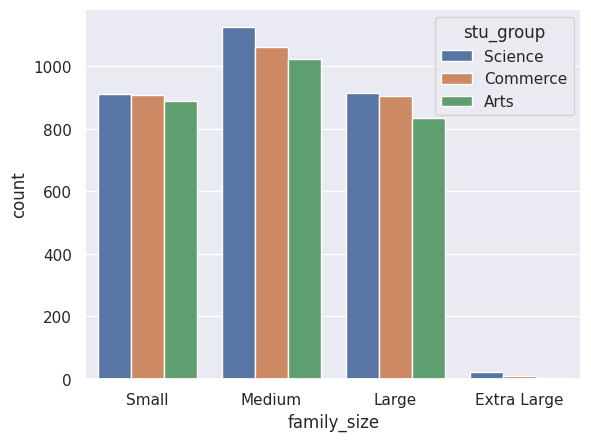

In [36]:
famulysize = pd.cut(df['family_size'], bins=[-1, 3,5,7,20], labels=['Small', 'Medium', 'Large', 'Extra Large'])
sns.countplot(x=famulysize, data=df , hue = 'stu_group')

> không ảnh hưởng đến target

#### **mother_education & father_education**

In [37]:
print(df['mother_education'].value_counts())
print(df['father_education'].value_counts())

mother_education
SSC             1492
HSC             1370
Diploma         1297
Under_SSC       1119
Non_Educated    1070
Honors          1061
Masters         1029
Hons             164
Name: count, dtype: int64
father_education
HSC             1345
SSC             1343
Masters         1286
Diploma         1259
Honors          1121
Non_Educated    1072
Under_SSC       1029
Hons             153
Name: count, dtype: int64


In [38]:
print(df['mother_education'].isnull().sum())
print(df['father_education'].isnull().sum())

10
4


In [39]:
# Group by 'stu_group' và điền giá trị NaN bằng giá trị xuất hiện nhiều nhất trong mỗi nhóm
df['mother_education'] = df.groupby('stu_group')['mother_education'].transform(lambda x: x.fillna(x.mode()[0]))
df['father_education'] = df.groupby('stu_group')['father_education'].transform(lambda x: x.fillna(x.mode()[0]))

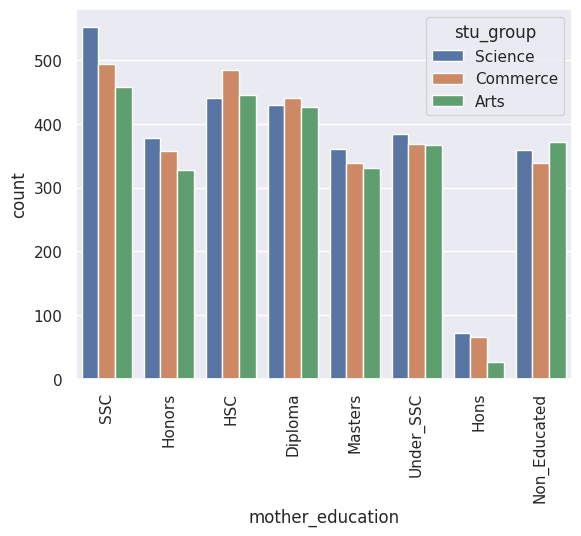

In [40]:
sns.countplot(x='mother_education', data=df, hue = 'stu_group')
plt.xticks(rotation=90);


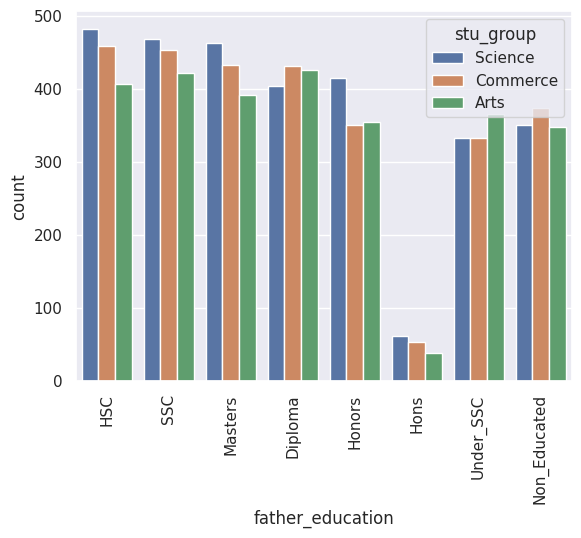

In [41]:
sns.countplot(x='father_education', data=df, hue = 'stu_group')
plt.xticks(rotation=90);

> tương đối

#### **'mother_job', 'father_job', 'guardian', 'parental_involvement', 'internet_access'**

In [42]:
temp_feature = ['mother_job', 'father_job', 'guardian', 'parental_involvement', 'internet_access']

In [43]:
df[temp_feature].isnull().sum()

,0
mother_job,0
father_job,0
guardian,0
parental_involvement,0
internet_access,0


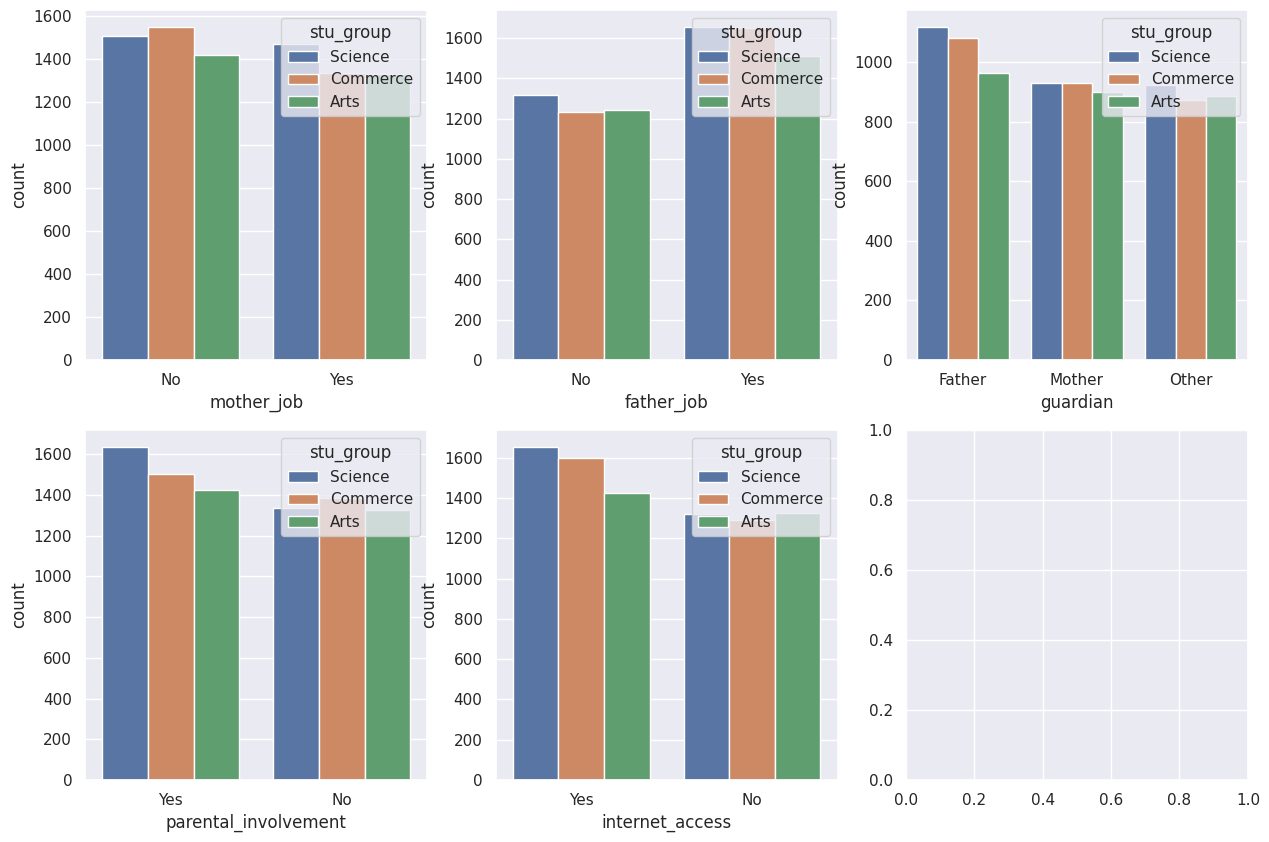

In [44]:
fix , ax = plt.subplots(2,3, figsize=(15,10))
for i, feature in enumerate(temp_feature):
  sns.countplot(x=feature, data=df, hue = 'stu_group',ax=ax[i//3, i%3])

> 'mother_job', 'father_job',
       'guardian', 'parental_involvement', 'internet_access' đều không ảnh hưởng lắm đến target

#### **studytime**

In [45]:
df['studytime'].value_counts()

,count
studytime,
6,1973
5,1079
4,984
8,971
7,934
1,909
2,878
3,872
9,8


<Axes: xlabel='studytime', ylabel='count'>

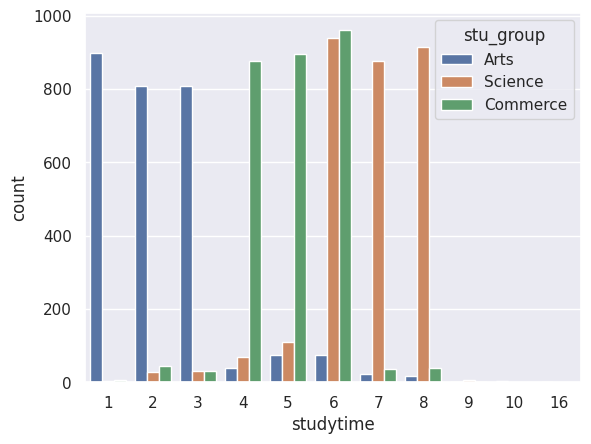

In [46]:
sns.countplot(x='studytime', data=df, hue = 'stu_group')

<Axes: xlabel='studytime', ylabel='count'>

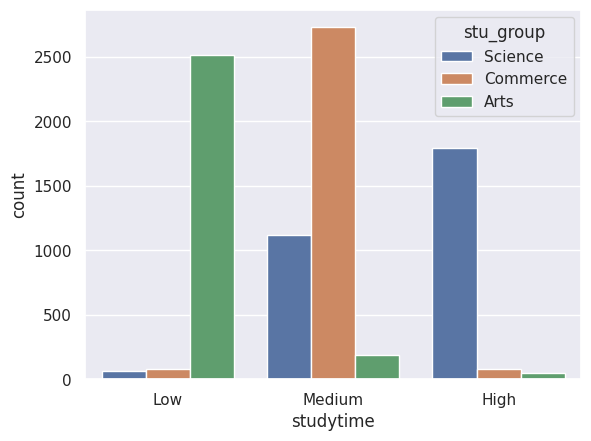

In [47]:
studytime = pd.cut(df['studytime'], bins=[-1, 3,6,20], labels=['Low', 'Medium', 'High'])
sns.countplot(x=studytime, data=df , hue = 'stu_group')

> có ảnh hưởng rõ rệt

In [48]:
df['studytime'] = pd.cut(df['studytime'], bins=[-1, 3,6,20], labels=['Low', 'Medium', 'High'])

#### **'tutoring', 'school_type'**


In [49]:
df['tutoring'].value_counts()

,count
tutoring,
Yes,4425
No,4187


In [50]:
df['school_type'].value_counts()

,count
school_type,
Govt,3151
Semi_Govt,3067
Private,2394


<Axes: xlabel='tutoring', ylabel='count'>

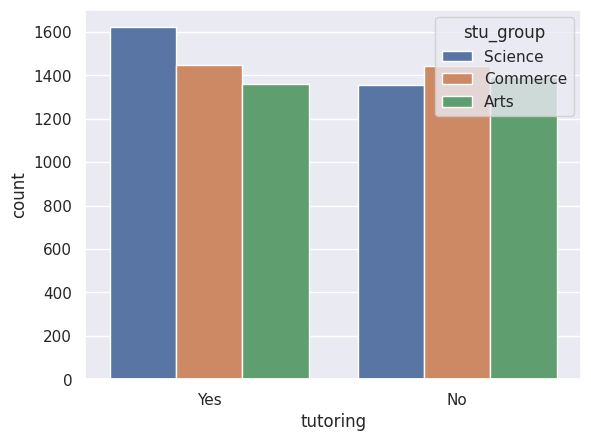

In [51]:
sns.countplot(x='tutoring', data=df, hue = 'stu_group')

> tương đối

<Axes: xlabel='school_type', ylabel='count'>

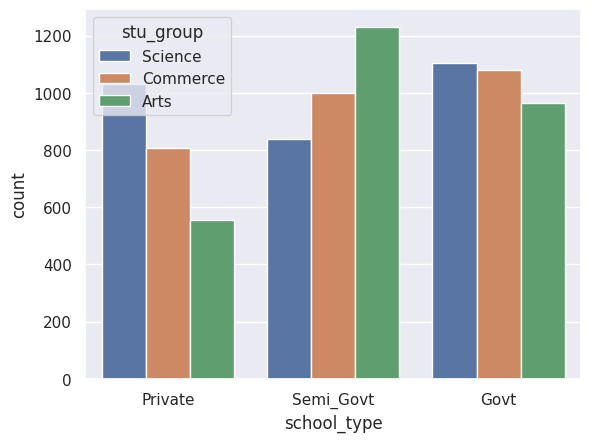

In [52]:
sns.countplot(x='school_type', data=df, hue = 'stu_group')

> có ảnh hưởng

#### **attendance**

In [53]:
df['attendance'].isnull().sum()

0

In [54]:
df['attendance'].dtypes.name

'int64'

<Axes: xlabel='attendance', ylabel='Count'>

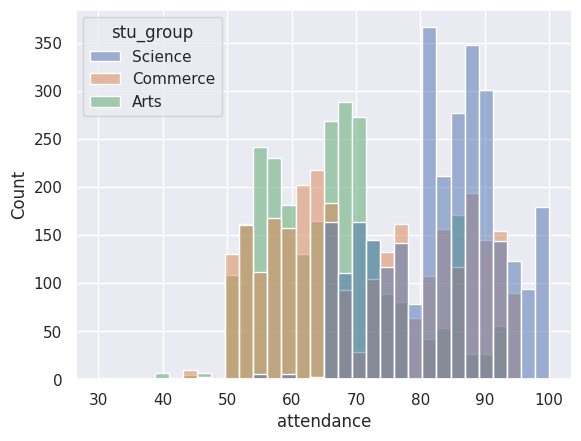

In [55]:
sns.histplot(data = df , x = df['attendance'] , hue = 'stu_group')

> có ảnh hưởng

#### **extra_curricular_activities**

In [56]:
df['extra_curricular_activities'].value_counts()

,count
extra_curricular_activities,
Yes,4583
No,4029


<Axes: xlabel='extra_curricular_activities', ylabel='count'>

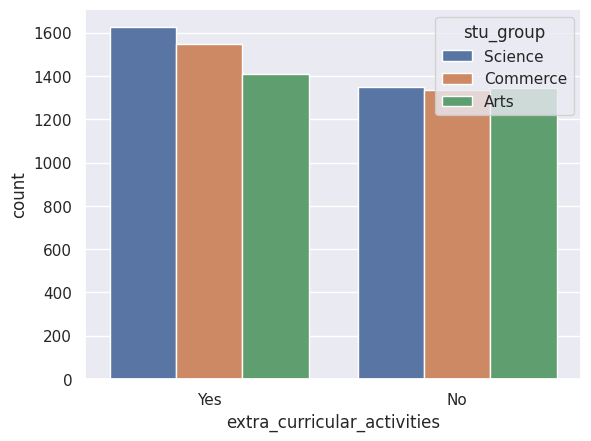

In [57]:
sns.countplot(x='extra_curricular_activities', data=df, hue = 'stu_group')

> không ảnh hưởng lắm

#### **'english', 'math', 'science', 'social_science', 'art_culture'**

In [58]:
temp_feature = ['english', 'math', 'science', 'social_science', 'art_culture']
df[temp_feature].describe()

,english,math,science,social_science,art_culture
count,8612.000000,8612.000000,8612.000000,8612.000000,8612.000000
mean,73.610427,72.938110,73.524036,74.465513,76.236066
std,15.343903,15.816147,15.115104,14.945846,13.619125
min,18.000000,33.000000,33.000000,36.000000,36.000000
25%,64.000000,64.000000,63.000000,65.000000,69.000000
50%,75.000000,73.000000,75.000000,77.000000,76.000000
75%,85.000000,84.000000,85.000000,86.000000,86.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000


In [59]:
df_new = df.copy()

<ipython-input-60-f52a318a33b3>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=90);
<ipython-input-60-f52a318a33b3>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=90);
<ipython-input-60-f52a318a33b3>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=90);
<ipython-input-60-f52a318a33b3>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=90);
<ipython-input-60-f52a318a33b3>:

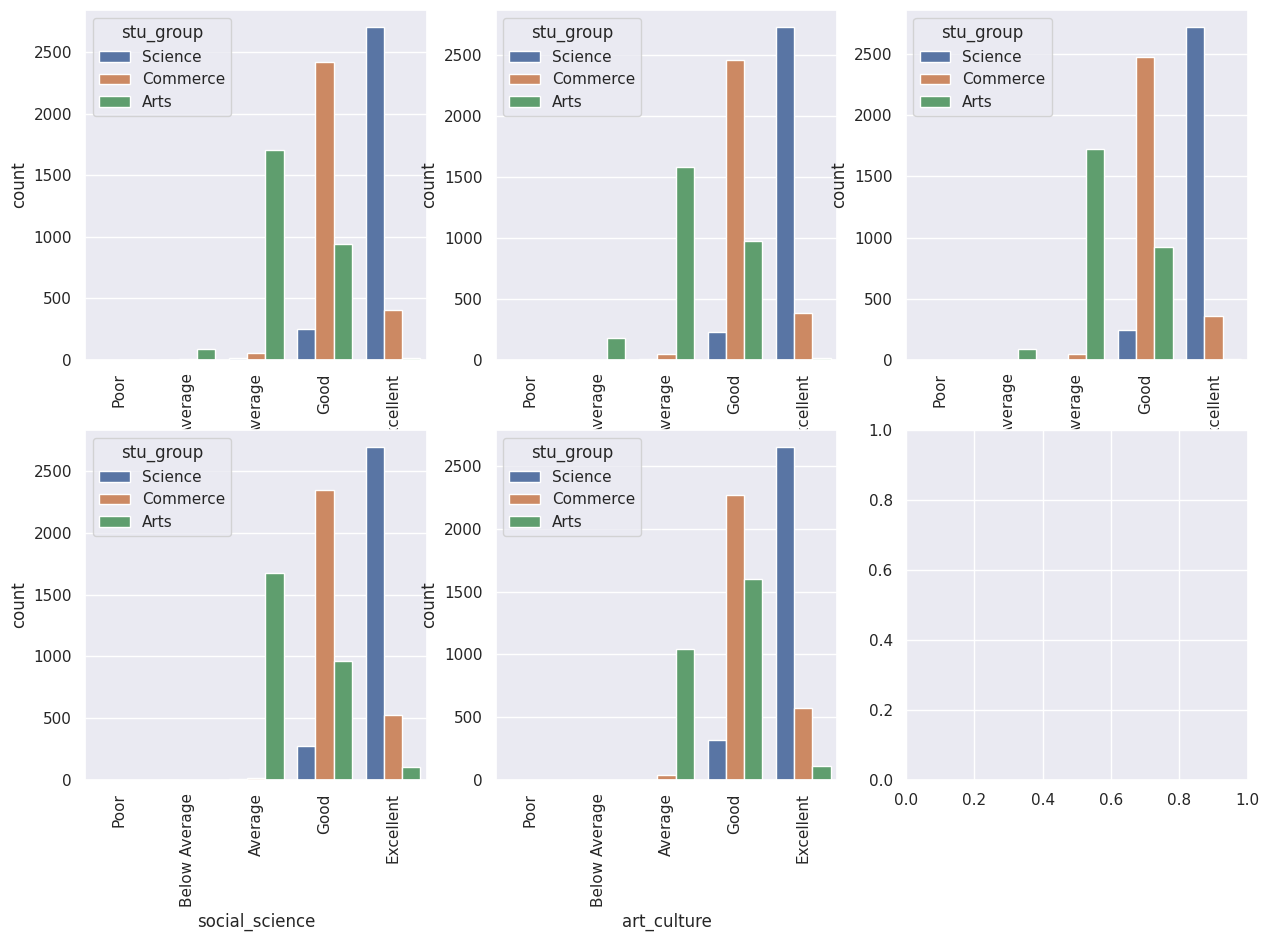

In [60]:
for feature in temp_feature:
  df_new[feature] = pd.cut(df_new[feature], bins=[0, 20,40,60,80,100], labels=['Poor', 'Below Average', 'Average', 'Good', 'Excellent'])
fix , ax = plt.subplots(2,3, figsize=(15,10))
for i, feature in enumerate(temp_feature):
  sns.countplot(x=feature, data=df_new, hue = 'stu_group',ax=ax[i//3, i%3])
  ax[i//3, i%3].set_xticklabels(ax[i//3, i%3].get_xticklabels(), rotation=90);

> tất cả đều có ảnh hưởng

### Preprocessing

In [61]:
numerical_features = ['attendance','english', 'math', 'science', 'social_science', 'art_culture']
categorical_features = ['mother_education', 'father_education','internet_access','studytime', 'school_type'  ]
for feature in categorical_features:
  df[feature] = df[feature].astype('category')
for feature in numerical_features:
  df[feature] = df[feature].astype('float')
features = numerical_features + categorical_features

In [62]:
df[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8612 entries, 0 to 8611
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   attendance        8612 non-null   float64 
 1   english           8612 non-null   float64 
 2   math              8612 non-null   float64 
 3   science           8612 non-null   float64 
 4   social_science    8612 non-null   float64 
 5   art_culture       8612 non-null   float64 
 6   mother_education  8612 non-null   category
 7   father_education  8612 non-null   category
 8   internet_access   8612 non-null   category
 9   studytime         8612 non-null   category
 10  school_type       8612 non-null   category
dtypes: category(5), float64(6)
memory usage: 447.0 KB


In [63]:
X = df[features]
y = df['stu_group']

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


# Tạo ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Chuẩn hóa các đặc trưng số
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Mã hóa One-Hot cho các đặc trưng phân loại
    ])




In [65]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

### Model comparison

In [66]:
from sklearn.model_selection import train_test_split
# Huấn luyện pipeline
preprocessor.fit(X)
X = preprocessor.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=2024)


In [67]:
X_train.shape

(6889, 30)

In [68]:
X_test.shape

(1723, 30)

In [69]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

seed = 2023
models = [
 LinearSVC(max_iter=12000, random_state=seed, dual='auto'), # No change, already correct
 SVC(random_state=seed),
 KNeighborsClassifier(metric='minkowski', p=2),
 LogisticRegression(solver='liblinear', max_iter=1000),
 DecisionTreeClassifier(random_state=seed),
 RandomForestClassifier(random_state=seed),
 ExtraTreesClassifier(),
 AdaBoostClassifier(algorithm='SAMME'), # Fixed SAMME.R deprecation
 XGBClassifier( eval_metric='logloss', random_state=seed) # Correct
]
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models , X, y , metrics , cv = 5 , plot_results = False):
  kfold = StratifiedKFold(cv, shuffle=True, random_state=seed)
  entries = []
  for model in models:
    model_name = model.__class__.__name__
    scores = cross_val_score(model, X,y, scoring = metrics, cv=kfold)
    for fold_idx, score in enumerate(scores) :
      entries.append((model_name, fold_idx, score))

    cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_id', 'accuracy_score' ])
    if plot_results:
      sns.boxplot(x='model_name', y='accuracy_score', data=cv_df, color='lightblue', showmeans=True)
      plt. title("Boxplot of Base-Line Model Accuracy using 5-fold cross-validation")
      plt.xticks (rotation=45)

    # Summary result
    mean = cv_df.groupby('model_name' )['accuracy_score' ].mean()
    std = cv_df.groupby('model_name' )['accuracy_score' ].std()
    baseline_results = pd.concat ([mean, std], axis = 1, ignore_index=True)
    baseline_results.columns = ['Mean', 'Standard Deviation']
    # sort by accuracy
    baseline_results.sort_values(by=[ 'Mean'], ascending=False, inplace=True)
  return baseline_results

generate_baseline_results(models, X, y_encoded, metrics='accuracy', cv=5, plot_results=False)



,Mean,Standard Deviation
model_name,,
XGBClassifier,0.986530,0.003520
RandomForestClassifier,0.983627,0.003141
ExtraTreesClassifier,0.978982,0.004238
DecisionTreeClassifier,0.975615,0.003074
SVC,0.969577,0.004992
KNeighborsClassifier,0.961797,0.004819
AdaBoostClassifier,0.961218,0.006707
LogisticRegression,0.949256,0.004859
LinearSVC,0.946702,0.004925


### Model training

In [70]:
xbg_model = XGBClassifier(eval_metric='logloss', random_state=seed)
xbg_model.fit(X_train, y_train)
y_pred = xbg_model.predict(X_test)


### Evaluation

In [71]:
y_pred

array([1, 1, 1, ..., 0, 1, 2])

Accuracy: 0.99


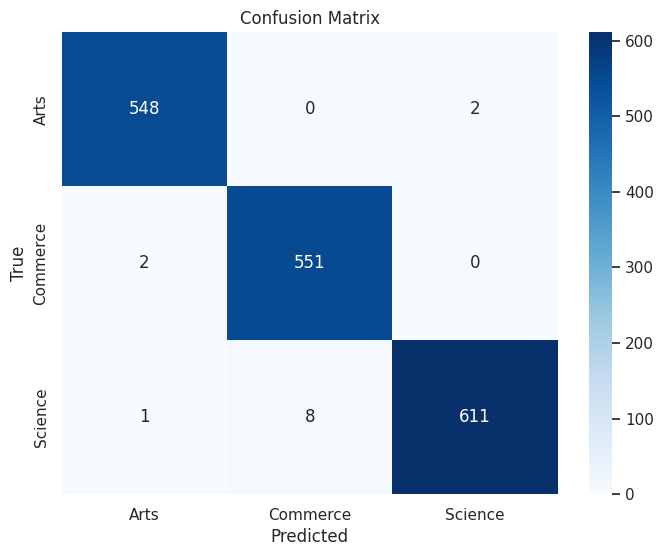

In [72]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Tính Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Vẽ Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
